In [ ]:


# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Machine Learning Libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.3 MB/s eta 0:00:00


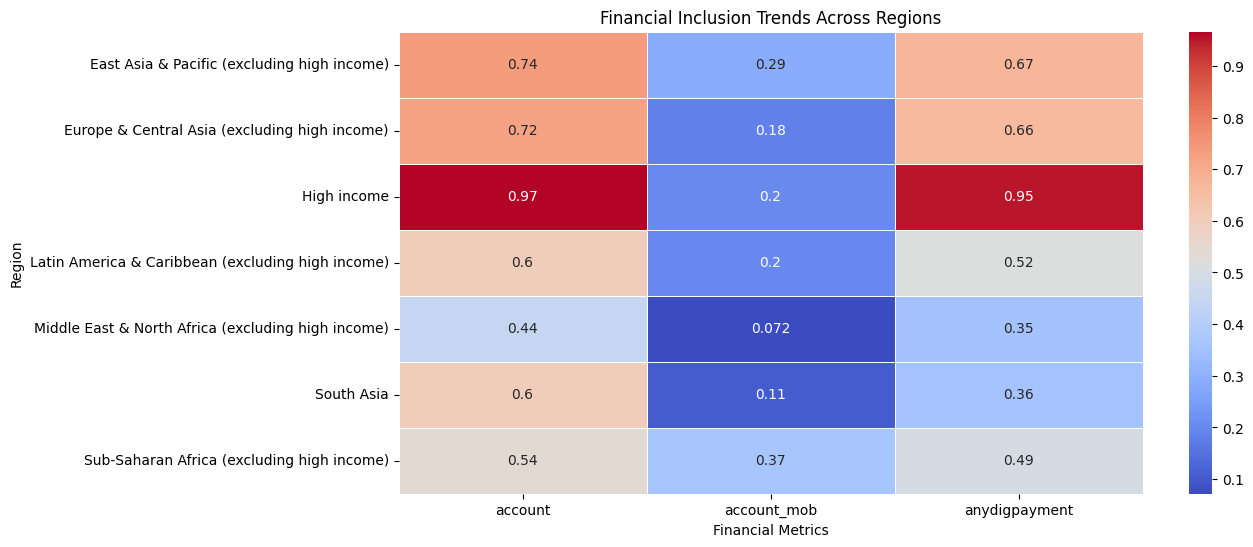

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
csv_file_path = "/content/micro_world_139countries.csv"  # Update with your actual path
chunk_size = 20000  # Optimized chunk size

# Select necessary columns
selected_columns = [
    'economy', 'regionwb', 'pop_adult', 'female', 'age', 'educ',
    'account', 'account_fin', 'account_mob', 'mobileowner', 'internetaccess',
    'anydigpayment', 'merchantpay_dig', 'saved', 'borrowed', 'receive_wages',
    'pay_utilities', 'remittances', 'year'
]

# Read CSV in chunks to avoid memory errors
df_csv_combined = pd.DataFrame()
for chunk in pd.read_csv(csv_file_path, encoding="ISO-8859-1", usecols=selected_columns, chunksize=chunk_size, low_memory=False):
    numeric_cols = ["account", "account_mob", "anydigpayment", "saved", "borrowed"]
    chunk[numeric_cols] = chunk[numeric_cols].apply(pd.to_numeric, errors='coerce')

    # Downcast numerical values to optimize memory
    for col in numeric_cols:
        chunk[col] = pd.to_numeric(chunk[col], downcast="float")

    df_csv_combined = pd.concat([df_csv_combined, chunk], ignore_index=True)

# Plot 1: Heatmap of Financial Inclusion by Region
plt.figure(figsize=(12, 6))
region_financials = df_csv_combined.groupby("regionwb")[["account", "account_mob", "anydigpayment"]].mean()
sns.heatmap(region_financials, cmap="coolwarm", annot=True, linewidths=0.5)
plt.title("Financial Inclusion Trends Across Regions")
plt.xlabel("Financial Metrics")
plt.ylabel("Region")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_country_data = pd.read_excel(xls, sheet_name='Data')

# Selecting the most useful features based on dataset inspection
country_features = [
    'Country name', 'Country code', 'Region', 'Income group', 'Year',
    'Account (% age 15+)', 'Financial institution account (% age 15+)',
    'Mobile money account (% age 15+)', 'Made or received a digital payment (% age 15+)',
    'Owns a credit card (% age 15+)', 'Used a credit card (% age 15+)',
    'Owns a debit card (% age 15+)', 'Used a debit card (% age 15+)',
    'Used a mobile phone or the internet to access an account (% age 15+)',
    'Used a mobile phone or the internet to buy something online (% age 15+)',
    'Used a mobile phone or the internet to send money (% age 15+)',
    'Saved any money (% age 15+)', 'Borrowed any money (% age 15+)',
    'Received wages: into an account (% age 15+)',
    'Made a utility payment: using an account (% age 15+)',
    'No account because financial services are too expensive (% age 15+)',
    'No account because financial institutions are too far away (% age 15+)',
    'No account because of a lack of necessary documentation (% age 15+)',
    'No account because of religious reasons (% age 15+)',
    'Most worrying financial issue: money for old age (% age 15+)',
    'Most worrying financial issue: paying school or education fees (% age 15+)',
    'Coming up with emergency funds in 30 days: possible (% age 15+)',
    'Coming up with emergency funds in 30 days: not possible (% age 15+)',
    'Own a mobile phone (% age 15+)',
]

# Filter the country dataset
df_country_filtered = df_country_data[country_features]

# Selecting key features from Micro World dataset
micro_features = [
    'economy', 'economycode', 'regionwb', 'pop_adult', 'female', 'age', 'educ',
    'urbanicity_f2f', 'account', 'account_fin', 'account_mob',
    'mobileowner', 'internetaccess', 'anydigpayment', 'merchantpay_dig',
    'saved', 'borrowed', 'receive_wages', 'pay_utilities', 'remittances', 'year'
]

df_micro_filtered = df_micro[micro_features]

# Merge datasets using 'Country code' and 'economycode'
df_merged = df_micro_filtered.merge(df_country_filtered, left_on='economycode', right_on='Country code', how='left')

# Drop redundant columns
df_merged.drop(['Country code'], axis=1, inplace=True)

# Handling missing values
df_merged.fillna({'Own a mobile phone (% age 15+)': 0,
                  'Made or received a digital payment (% age 15+)': 0,
                  'Borrowed any money (% age 15+)': 0, 'Saved any money (% age 15+)': 0,
                  'Used a mobile phone or the internet to buy something online (% age 15+)': 0,
                  'Used a mobile phone or the internet to pay bills (% age 15+)': 0,
                  'Used a mobile phone or the internet to send money (% age 15+)': 0}, inplace=True)

# Save the cleaned and enriched dataset
df_merged.to_csv('/content/merged_dataset.csv', index=False)

# Display dataset info and shape
print(f"Optimized Dataset Shape: {df_merged.shape}")
print("Optimized dataset saved as 'merged_dataset.csv'.")

# Display first few rows of the dataset
print(df_merged.head())

Optimized Dataset Shape: (550014, 49)
Optimized dataset saved as 'merged_dataset.csv'.
       economy economycode    regionwb   pop_adult  female   age  educ  \
0  Afghanistan         AFG  South Asia  22647496.0       2  43.0     2   
1  Afghanistan         AFG  South Asia  22647496.0       2  43.0     2   
2  Afghanistan         AFG  South Asia  22647496.0       2  43.0     2   
3  Afghanistan         AFG  South Asia  22647496.0       2  43.0     2   
4  Afghanistan         AFG  South Asia  22647496.0       2  55.0     1   

   urbanicity_f2f  account  account_fin  ...  \
0             1.0        1            1  ...   
1             1.0        1            1  ...   
2             1.0        1            1  ...   
3             1.0        1            1  ...   
4             1.0        0            0  ...   

   Made a utility payment: using an account (% age 15+)  \
0                                                NaN      
1                                           0.006313      
2 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Load Optimized Dataset
df = pd.read_csv('/content/merged_dataset.csv')

# Summary Statistics
print(df.describe())

          pop_adult         female            age           educ  \
count  5.500140e+05  550014.000000  548165.000000  550014.000000   
mean   7.703993e+07       1.468397      41.269034       1.980266   
std    2.300454e+08       0.499001      17.363010       0.720665   
min    2.952496e+05       1.000000      15.000000       1.000000   
25%    4.670267e+06       1.000000      27.000000       1.000000   
50%    1.029182e+07       1.000000      38.000000       2.000000   
75%    3.428881e+07       2.000000      54.000000       2.000000   
max    1.153773e+09       2.000000      99.000000       5.000000   

       urbanicity_f2f        account    account_fin    account_mob  \
count   283047.000000  550014.000000  550014.000000  309295.000000   
mean         1.586641       0.715716       0.664532       0.260715   
std          0.492437       0.451073       0.472154       0.439026   
min          1.000000       0.000000       0.000000       0.000000   
25%          1.000000       0.000000 

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Print available columns
print("Available columns in DataFrame:")
print(df.columns.tolist())

# Handle Missing Values for Numeric Columns
imputer = SimpleImputer(strategy='median')
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Encode Categorical Features
encoder = LabelEncoder()
for col in ['Income group', 'regionwb', 'economy']:
    if col in df.columns:  # Check if column exists
        df[col] = encoder.fit_transform(df[col])

# Normalize Continuous Features
scaler = StandardScaler()
continuous_cols = ['age', 'Account (% age 15+)', 'Financial institution account (% age 15+)',
                   'Mobile money account (% age 15+)', 'Digital payments (% age 15+)']

# Keep only existing columns
continuous_cols = [col for col in continuous_cols if col in df.columns]

# Apply StandardScaler only on existing columns
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

# Selecting Most Relevant Features
selected_features = ['age', 'educ', 'mobileowner', 'internetaccess', 'account', 'remittances',
                     'Account (% age 15+)', 'Financial institution account (% age 15+)',
                     'Mobile money account (% age 15+)', 'Digital payments (% age 15+)', 'Income group']

# Keep only existing columns
selected_features = [col for col in selected_features if col in df.columns]
target = 'anydigpayment'

print(f"Final Features Selected: {selected_features}")


Available columns in DataFrame:
['economy', 'economycode', 'regionwb', 'pop_adult', 'female', 'age', 'educ', 'urbanicity_f2f', 'account', 'account_fin', 'account_mob', 'mobileowner', 'internetaccess', 'anydigpayment', 'merchantpay_dig', 'saved', 'borrowed', 'receive_wages', 'pay_utilities', 'remittances', 'year', 'Country name', 'Region', 'Income group', 'Year', 'Account (% age 15+)', 'Financial institution account (% age 15+)', 'Mobile money account (% age 15+)', 'Made or received a digital payment (% age 15+)', 'Owns a credit card (% age 15+)', 'Used a credit card (% age 15+)', 'Owns a debit card (% age 15+)', 'Used a debit card (% age 15+)', 'Used a mobile phone or the internet to access an account (% age 15+)', 'Used a mobile phone or the internet to buy something online (% age 15+)', 'Used a mobile phone or the internet to send money (% age 15+)', 'Saved any money (% age 15+)', 'Borrowed any money (% age 15+)', 'Received wages: into an account (% age 15+)', 'Made a utility payment

In [ ]:
from sklearn.model_selection import train_test_split

# Define Features (X) and Target Variable (y)
X = df[selected_features]
y = df[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print dataset shape
print(f"Training Data Shape: {X_train.shape}, Testing Data Shape: {X_test.shape}")
print(f"Class Distribution in Train Data:\n{y_train.value_counts(normalize=True)}")
print(f"Class Distribution in Test Data:\n{y_test.value_counts(normalize=True)}")

Training Data Shape: (440011, 10), Testing Data Shape: (110003, 10)
Class Distribution in Train Data:
anydigpayment
1.0    0.656922
0.0    0.343078
Name: proportion, dtype: float64
Class Distribution in Test Data:
anydigpayment
1.0    0.656918
0.0    0.343082
Name: proportion, dtype: float64


In [34]:
import pandas as pd
import numpy as np
import xgboost as xgb
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

if "anydigpayment" not in df.columns:
    raise ValueError("Column 'anydigpayment' not found in dataset. Check column names.")

features = ["age", "account", "account_mob", "saved", "borrowed"]
X = df[features].dropna()
y = df.loc[X.index, "anydigpayment"]

# Convert target variable to binary (0 = No, 1 = Yes)
y = (y > 0).astype(int)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Optimize XGBoost using Optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5)
    }
    model = xgb.XGBClassifier(**params, use_label_encoder=False, eval_metric='logloss')

    # Perform cross-validation to evaluate performance
    score = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=3, n_jobs=-1).mean()

    return score

# Run Optuna optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)
best_params = study.best_params

# Train Optimized XGBoost
xgb_model = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("\nLogistic Regression Report:")
print(classification_report(y_test, y_pred_log))

print("\nRandom Forest Report:")
print(classification_report(y_test, y_pred_rf))

print("\nOptimized XGBoost Report:")
print(classification_report(y_test, y_pred_xgb))

print("\nModel Accuracies:")
print(f"Logistic Regression: {accuracy_score(y_test, y_pred_log):.2%}")
print(f"Random Forest: {accuracy_score(y_test, y_pred_rf):.2%}")
print(f"Optimized XGBoost: {accuracy_score(y_test, y_pred_xgb):.2%}")


[I 2025-02-15 09:37:00,663] A new study created in memory with name: no-name-45f08697-e643-40f0-aae7-f4e70108057f
[I 2025-02-15 09:37:20,282] Trial 0 finished with value: 0.9706459019908422 and parameters: {'n_estimators': 369, 'max_depth': 5, 'learning_rate': 0.2256180171666256, 'subsample': 0.6930409440496721, 'colsample_bytree': 0.7035524518146504, 'gamma': 0.5962728216607649}. Best is trial 0 with value: 0.9706459019908422.
[I 2025-02-15 09:37:29,871] Trial 1 finished with value: 0.9706179755575776 and parameters: {'n_estimators': 372, 'max_depth': 12, 'learning_rate': 0.15101776294103506, 'subsample': 0.6417844492406098, 'colsample_bytree': 0.7763375729358232, 'gamma': 1.842746107860032}. Best is trial 0 with value: 0.9706459019908422.
[I 2025-02-15 09:37:34,897] Trial 2 finished with value: 0.9704327468544184 and parameters: {'n_estimators': 192, 'max_depth': 12, 'learning_rate': 0.12873871953963376, 'subsample': 0.6732389665019864, 'colsample_bytree': 0.8254126417827422, 'gamma'


Logistic Regression Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91     30209
           1       0.86      1.00      0.93     31583

    accuracy                           0.92     61792
   macro avg       0.93      0.92      0.92     61792
weighted avg       0.93      0.92      0.92     61792


Random Forest Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91     30209
           1       0.86      1.00      0.93     31583

    accuracy                           0.92     61792
   macro avg       0.93      0.92      0.92     61792
weighted avg       0.93      0.92      0.92     61792


Optimized XGBoost Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91     30209
           1       0.86      1.00      0.93     31583

    accuracy                           0.92     61792
   macro avg       0.93      0.92      0.92     6

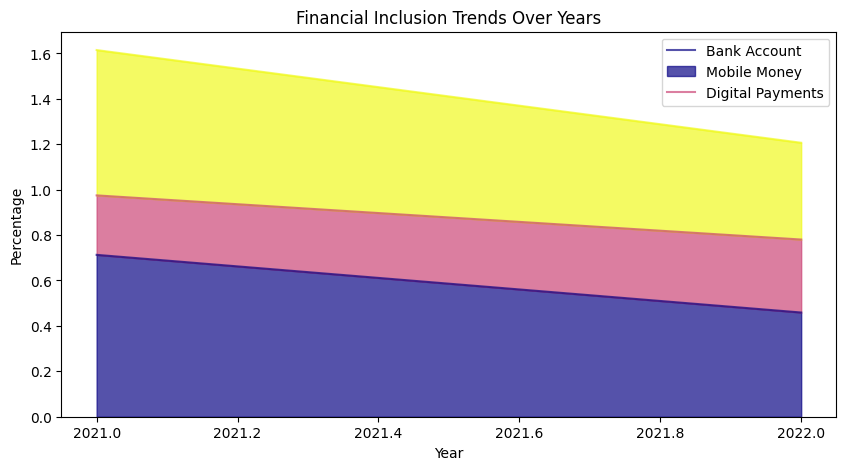

In [41]:
import matplotlib.pyplot as plt

# Group by year and calculate mean
df_trends = df_csv_sample.groupby("year")[["account", "account_mob", "anydigpayment"]].mean()

# Plot stacked area chart
df_trends.plot(kind="area", stacked=True, figsize=(10, 5), colormap="plasma", alpha=0.7)

# Labels and title
plt.title("Financial Inclusion Trends Over Years")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.legend(["Bank Account", "Mobile Money", "Digital Payments"])

# Show plot
plt.show()

Available columns: Index(['economy', 'economycode', 'regionwb', 'pop_adult', 'wpid_random', 'wgt',
       'female', 'age', 'educ', 'inc_q',
       ...
       'receive_transfers', 'receive_pension', 'receive_agriculture',
       'pay_utilities', 'remittances', 'mobileowner', 'internetaccess',
       'anydigpayment', 'merchantpay_dig', 'year'],
      dtype='object', length=128)


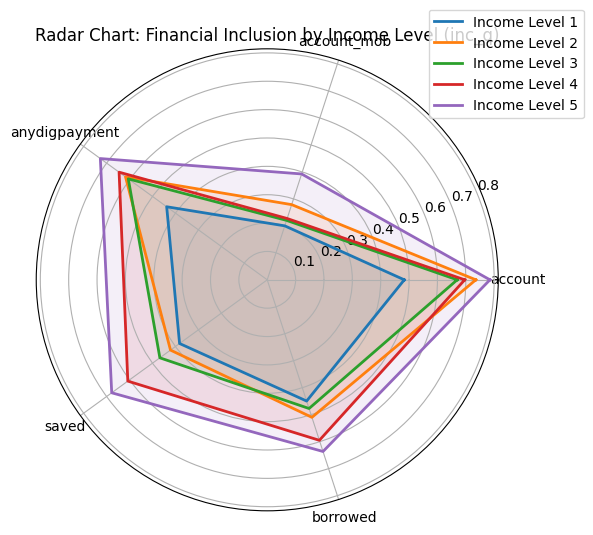

In [42]:
from math import pi

# Check available columns
print("Available columns:", df_csv_sample.columns)

# Use "inc_q" as an alternative for Income group
income_column = "inc_q"  # Update this if there's a better match

# Select relevant financial inclusion metrics
categories = ["account", "account_mob", "anydigpayment", "saved", "borrowed"]

# Check if all required columns exist
missing_cols = [col for col in categories if col not in df_csv_sample.columns]
if missing_cols:
    print(f"Error: Missing columns {missing_cols} in dataset.")
else:
    # Group by "inc_q" instead of "Income group"
    income_groups = df_csv_sample.groupby(income_column)[categories].mean()

    # Create radar chart for each income group
    fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += angles[:1]  # Close the circle

    for income_group in income_groups.index:
        values = income_groups.loc[income_group].values.flatten().tolist()
        values += values[:1]  # Close the circle
        ax.plot(angles, values, linewidth=2, linestyle="solid", label=f"Income Level {income_group}")
        ax.fill(angles, values, alpha=0.1)

    plt.xticks(angles[:-1], categories, color="black", size=10)
    plt.title("Radar Chart: Financial Inclusion by Income Level (inc_q)")
    plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))
    plt.show()


<ipython-input-35-d055a25cc561>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="age", y="anydigpayment", data=df_csv_sample, palette="coolwarm", inner="quartile")


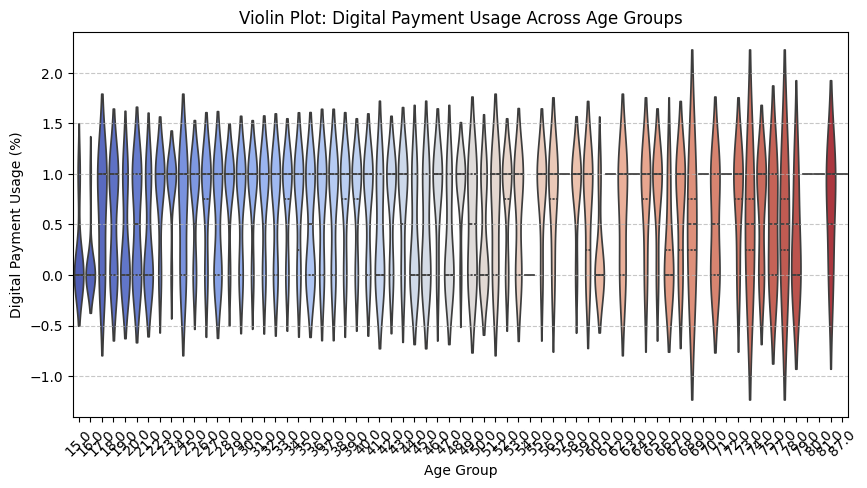

In [35]:
plt.figure(figsize=(10, 5))
sns.violinplot(x="age", y="anydigpayment", data=df_csv_sample, palette="coolwarm", inner="quartile")
plt.xticks(rotation=45)
plt.xlabel("Age Group")
plt.ylabel("Digital Payment Usage (%)")
plt.title("Violin Plot: Digital Payment Usage Across Age Groups")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

<ipython-input-23-a0149e3aa477>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="age", y="anydigpayment", data=df, palette="coolwarm")


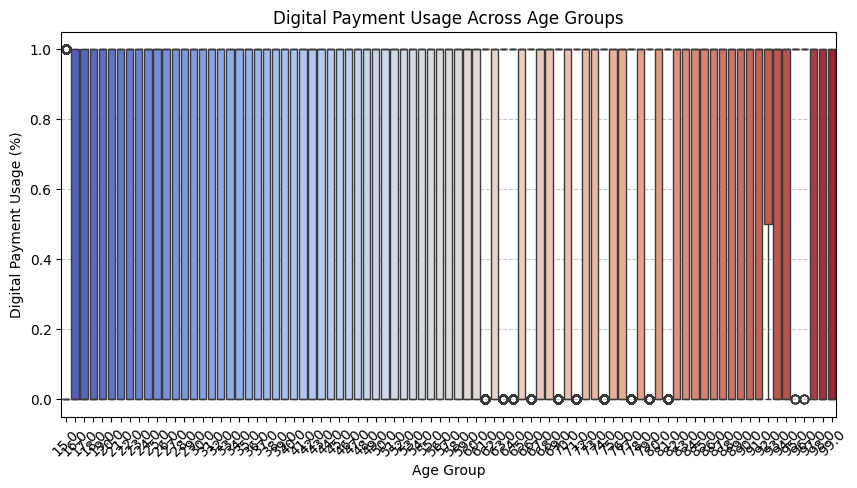

In [ ]:
df = pd.read_csv("/content/merged_dataset.csv")

# Plot Digital Payment Usage Across Age Groups
plt.figure(figsize=(10, 5))
sns.boxplot(x="age", y="anydigpayment", data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Age Group")
plt.ylabel("Digital Payment Usage (%)")
plt.title("Digital Payment Usage Across Age Groups")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


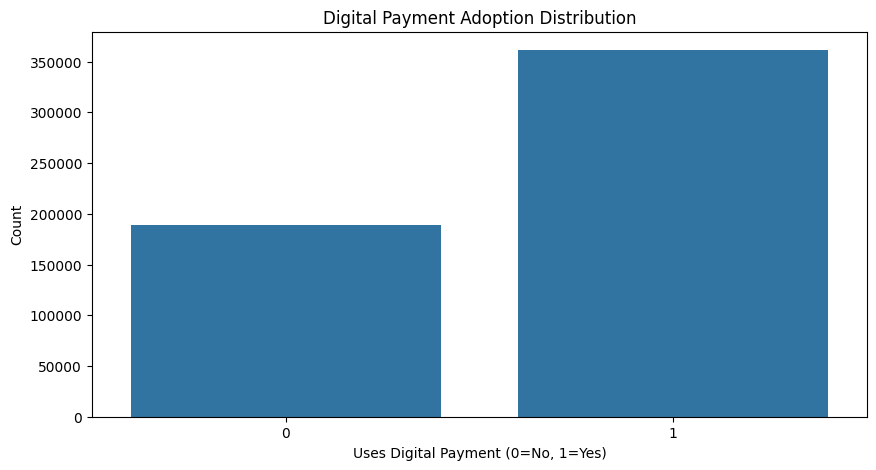

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/merged_dataset.csv")
plt.figure(figsize=(10, 5))
sns.countplot(x=df["anydigpayment"])
plt.title("Digital Payment Adoption Distribution")
plt.xlabel("Uses Digital Payment (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()

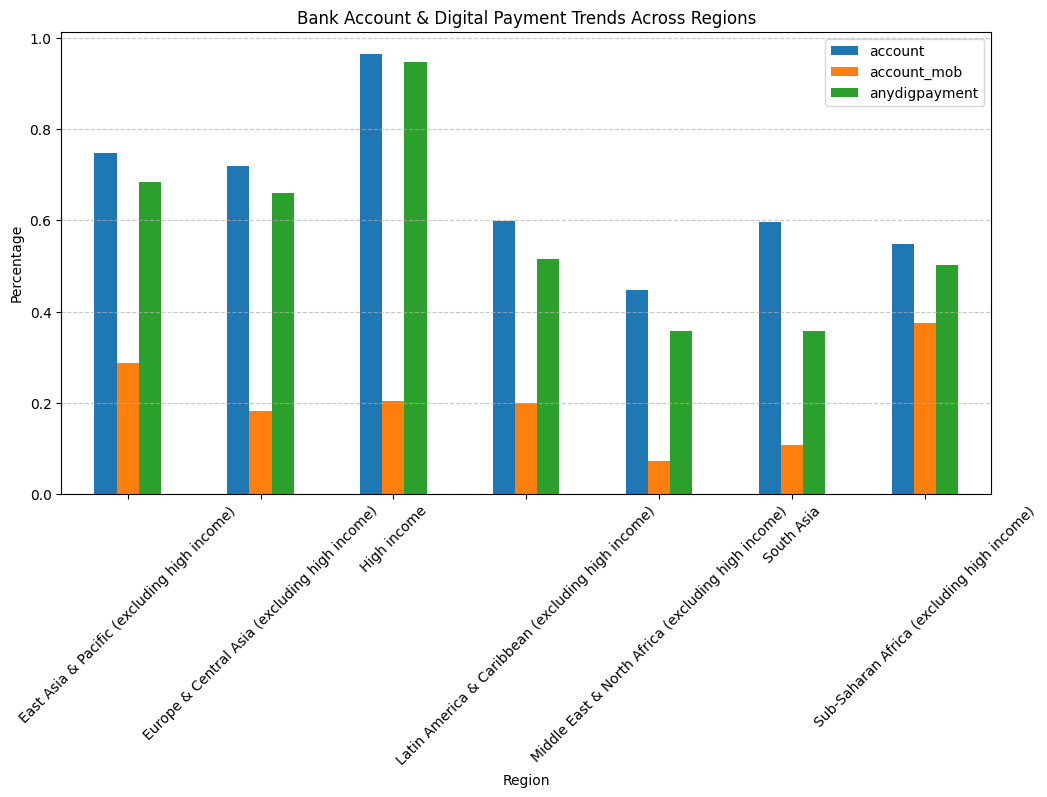

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/merged_dataset.csv")

# Group by region and calculate mean values
region_financials = df.groupby("regionwb")[["account", "account_mob", "anydigpayment"]].mean()

# Plot the bar chart
region_financials.plot(kind="bar", figsize=(12, 6))
plt.title("Bank Account & Digital Payment Trends Across Regions")
plt.xlabel("Region")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

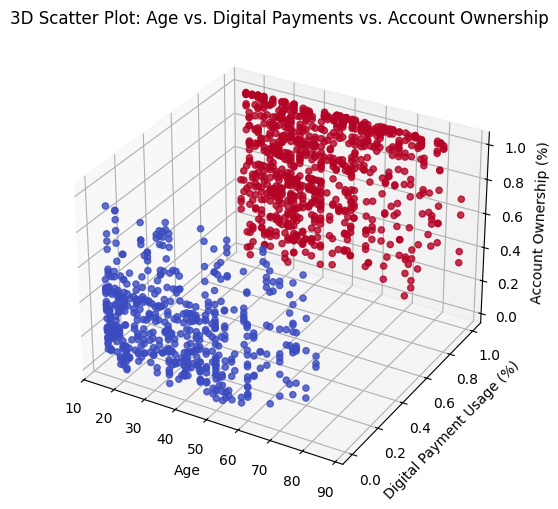

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# File paths (Ensure files are uploaded to Google Colab or available in the directory)
csv_file_path = "/content/micro_world_139countries.csv"
excel_file_path = "/content/CountryLevel_DatabankWide.xlsx"

# Load datasets
df_csv = pd.read_csv(csv_file_path, encoding="ISO-8859-1", low_memory=False)
df_excel = pd.read_excel(excel_file_path, sheet_name=0)

# Drop empty columns
df_csv_cleaned = df_csv.dropna(axis=1, how='all')
df_excel_cleaned = df_excel.dropna(axis=1, how='all')

# Check if required columns exist
required_columns_csv = ["age", "anydigpayment"]
required_columns_excel = ["Account (% age 15+)"]

missing_columns_csv = [col for col in required_columns_csv if col not in df_csv_cleaned.columns]
missing_columns_excel = [col for col in required_columns_excel if col not in df_excel_cleaned.columns]

if missing_columns_csv or missing_columns_excel:
    print("\n🚨 Required columns missing:")
    if missing_columns_csv:
        print("Missing in CSV:", missing_columns_csv)
    if missing_columns_excel:
        print("Missing in Excel:", missing_columns_excel)
else:
    # Sample 500 rows for visualization
    df_csv_sample = df_csv_cleaned.sample(n=min(500, len(df_csv_cleaned)), random_state=42)
    df_excel_sample = df_excel_cleaned.sample(n=min(500, len(df_excel_cleaned)), random_state=42)

    # Merge the two datasets based on the common country identifier
    merged_df = df_csv_sample.merge(df_excel_sample, left_on="economy", right_on="Country name", how="inner")

    # 3D Scatter Plot
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(merged_df["age"], merged_df["anydigpayment"], merged_df["Account (% age 15+)"],
               c=merged_df["anydigpayment"], cmap="coolwarm", alpha=0.8)

    ax.set_xlabel("Age")
    ax.set_ylabel("Digital Payment Usage (%)")
    ax.set_zlabel("Account Ownership (%)")
    ax.set_title("3D Scatter Plot: Age vs. Digital Payments vs. Account Ownership")

    plt.show()


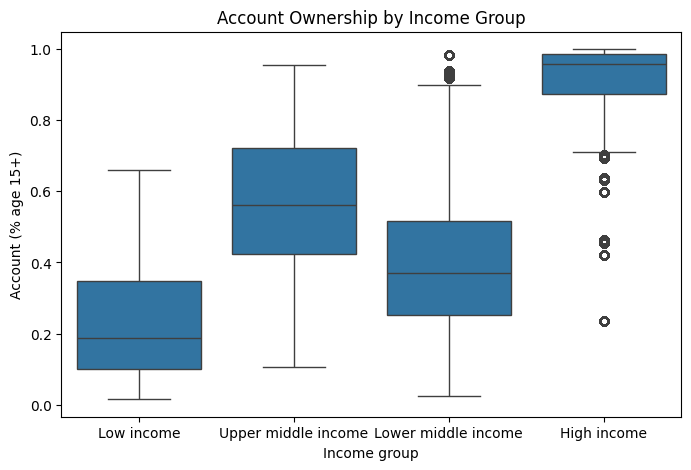

In [ ]:
# Financial Inclusion by Income Group
plt.figure(figsize=(8, 5))
sns.boxplot(x='Income group', y='Account (% age 15+)', data=df)
plt.title("Account Ownership by Income Group")
plt.show()

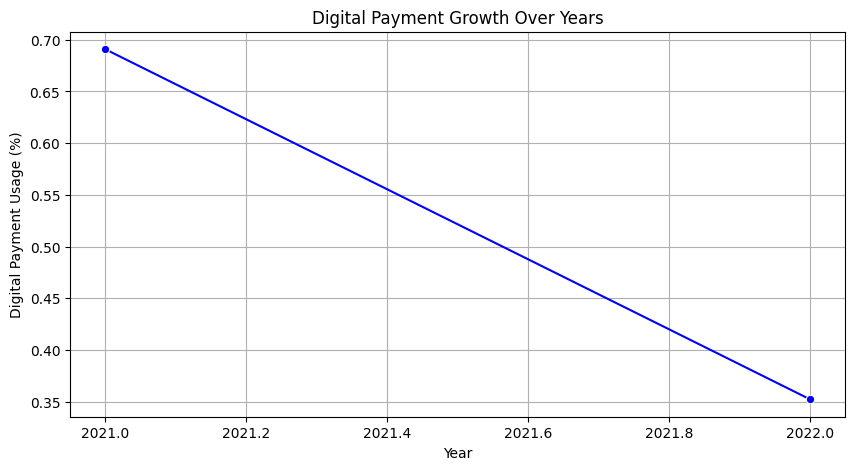

In [ ]:
# Plot the trend
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_yearly.index, y=df_yearly.values, marker="o", color="blue")
plt.xlabel("Year")
plt.ylabel("Digital Payment Usage (%)")
plt.title("Digital Payment Growth Over Years")
plt.grid(True)
plt.show()


<ipython-input-46-754c1d156f75>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="viridis")  # Changed color palette


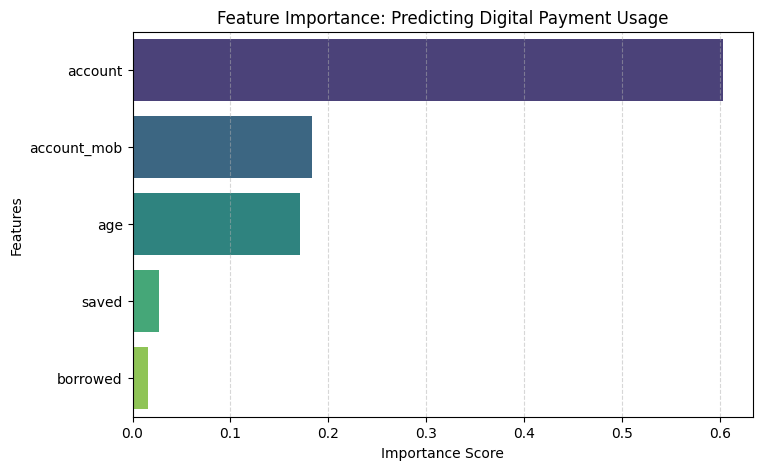

In [46]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Select features and target
feature_cols = ["age", "account", "account_mob", "saved", "borrowed"]

# Drop NaN values
df_cleaned = df_csv_sample.dropna(subset=feature_cols + ["anydigpayment"])

X = df_cleaned[feature_cols]
y = df_cleaned["anydigpayment"]

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame({
    "Feature": feature_cols,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="viridis")  # Changed color palette
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance: Predicting Digital Payment Usage")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()


Feature Importance Table
       Feature  Importance
1      account    0.712841
2  account_mob    0.223449
3        saved    0.039785
0          age    0.013518
4     borrowed    0.010407


<ipython-input-47-e8435554886b>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances["Importance"], y=feature_importances["Feature"], palette="viridis")


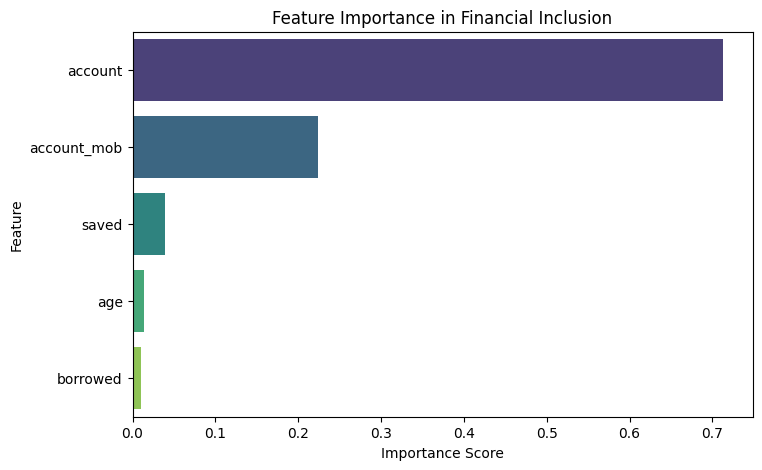

In [47]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# File paths
csv_file_path = "/content/micro_world_139countries.csv"
excel_file_path = "/content/CountryLevel_DatabankWide.xlsx"

# Read the Excel file
df_excel = pd.read_excel(excel_file_path, sheet_name=0)
df_excel_cleaned = df_excel.dropna(axis=1, how="all")  # Remove empty columns

# Read CSV file (Sampling to handle large size)
df_csv = pd.read_csv(csv_file_path, encoding="ISO-8859-1", low_memory=False)
df_csv_cleaned = df_csv.dropna(axis=1, how="all")  # Drop empty columns

# Select relevant financial features
feature_cols = ["age", "account", "account_mob", "saved", "borrowed"]

# Ensure only available columns are used
feature_cols = [col for col in feature_cols if col in df_csv_cleaned.columns]

# Prepare feature matrix (X) and target variable (y)
df_cleaned = df_csv_cleaned.dropna(subset=feature_cols + ["anydigpayment"])  # Remove NaN rows
X = df_cleaned[feature_cols]
y = df_cleaned["anydigpayment"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_scaled, y)

# Get feature importance scores
feature_importances = pd.DataFrame({
    "Feature": feature_cols,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Print feature importance table
print("Feature Importance Table")
print(feature_importances)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances["Importance"], y=feature_importances["Feature"], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Financial Inclusion")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')